In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data = pd.read_csv('Car.csv')
print(data.head())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [3]:
print(data.isnull().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [4]:
num_cols = ['Year', 'Present_Price', 'Driven_kms', 'Owner']
data[num_cols] = data[num_cols].fillna(data[num_cols].median())
cat_cols = ['Fuel_Type', 'Selling_type', 'Transmission']
data[cat_cols] = data[cat_cols].fillna(data[cat_cols].mode().iloc[0])

In [5]:
X = data.drop(columns=['Selling_Price'])
y = data['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission']
numerical_features = ['Year', 'Present_Price', 'Driven_kms', 'Owner']

In [7]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [8]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [9]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year', 'Present_Price',
                                                   'Driven_kms', 'Owner']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Fuel_Type', 'Selling_type',
                                                   'Transmission'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [10]:
y_pred = model.predict(X_test)

In [11]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared Score: {r2}')

Mean Absolute Error (MAE): 0.6101344262295083
Mean Squared Error (MSE): 0.8263443475409831
Root Mean Squared Error (RMSE): 0.9090348439641811
R-squared Score: 0.9641274851604863


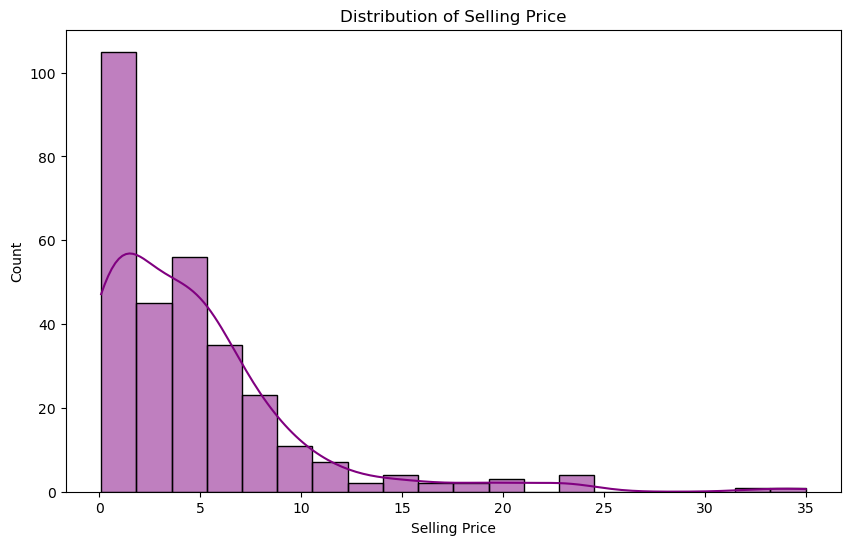

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Selling_Price'], bins=20, kde=True, color='purple')
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Count')
plt.show()

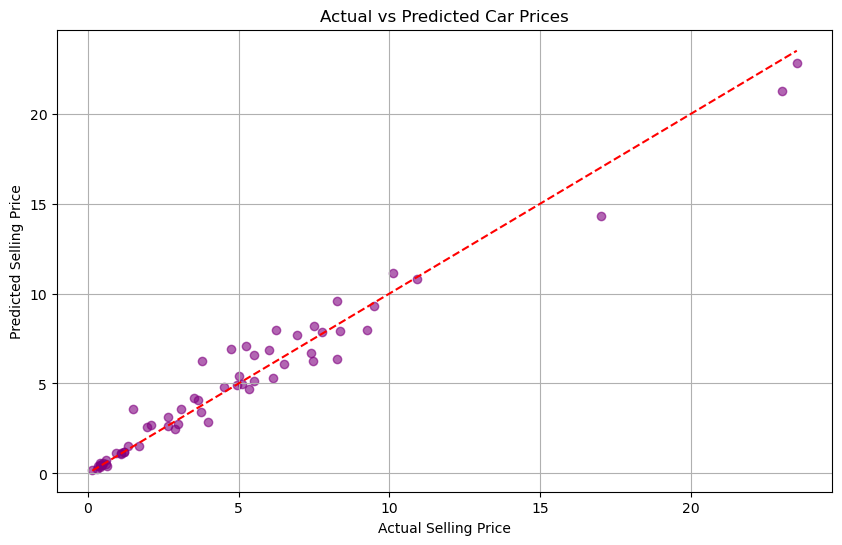

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Car Prices')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.grid(True)
plt.show()

In [17]:
import numpy as np
import pandas as pd
column_names = ['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']
new_car = np.array([[2015, 6.8, 36000, 2, 0, 1, 0]])
new_car_df = pd.DataFrame(new_car, columns=column_names)
categorical_cols = ['Fuel_Type', 'Selling_type', 'Transmission', 'Owner']
new_car_df[categorical_cols] = new_car_df[categorical_cols].astype('object')
new_car_scaled = model.named_steps['preprocessor'].transform(new_car_df)
predicted_price = model.named_steps['regressor'].predict(new_car_scaled)
predicted_price = max(predicted_price[0], 0)
print(f"\nPredicted Car Price: ₹{predicted_price:.2f} Lakhs")


Predicted Car Price: ₹4.40 Lakhs
